<a href="https://colab.research.google.com/github/Sowmya-2348562/Advanced-Data-Analytics/blob/main/2348562_image_segmentation_ada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Thresholding

In [1]:
import cv2 as cv

In [2]:
import numpy as np

from matplotlib import pyplot as plt

img = cv.imread('/content/textbk.jpeg', cv.IMREAD_GRAYSCALE)


# Simple Thresholding

In [ ]:
ret,thresh1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
ret,thresh2 = cv.threshold(img,127,255,cv.THRESH_BINARY_INV)
ret,thresh3 = cv.threshold(img,127,255,cv.THRESH_TRUNC)
ret,thresh4 = cv.threshold(img,127,255,cv.THRESH_TOZERO)
ret,thresh5 = cv.threshold(img,127,255,cv.THRESH_TOZERO_INV)

In [ ]:
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

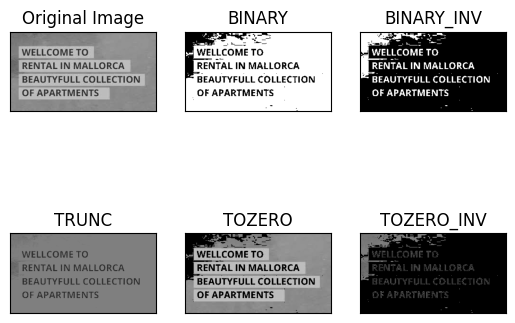

In [ ]:
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

how its separating text from background

other than boundary its trying to change pixel value

In [13]:
image = cv.imread('/content/bckgnd.jpeg',cv.IMREAD_GRAYSCALE)

In [23]:
ret,thresh1 = cv.threshold(image,127,255,cv.THRESH_BINARY)

In [24]:
ret,thresh2 = cv.threshold(image,127,255,cv.THRESH_BINARY_INV)
ret,thresh3 = cv.threshold(image,127,255,cv.THRESH_TRUNC)
ret,thresh4 = cv.threshold(image,127,255,cv.THRESH_TOZERO)
ret,thresh5 = cv.threshold(image,127,255,cv.THRESH_TOZERO_INV)


In [25]:
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [image, thresh1, thresh2, thresh3, thresh4, thresh5]

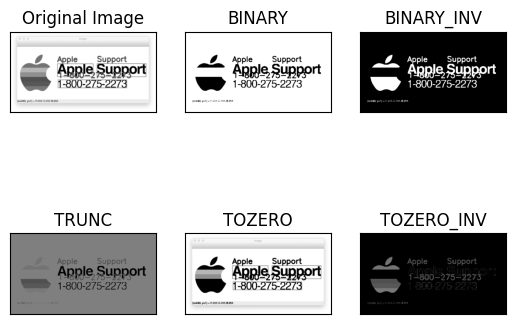

In [26]:
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

In [22]:
image = cv.imread('/content/txt_local.png',cv.IMREAD_GRAYSCALE)

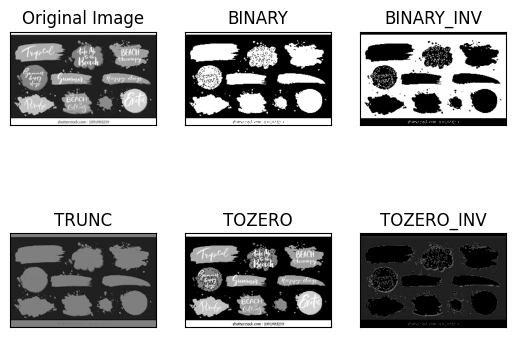

In [21]:
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

# Adaptive Thresholding

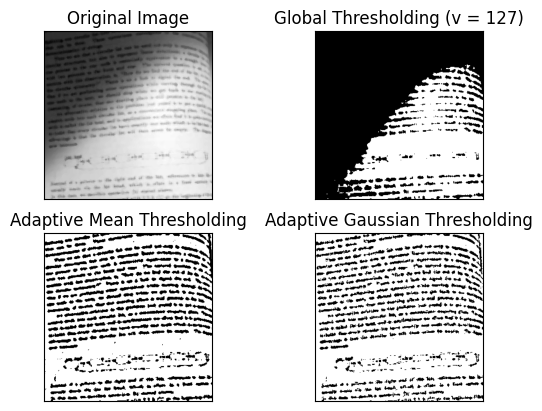

In [46]:
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('/content/adap.jpg', cv.IMREAD_GRAYSCALE)
img = cv.medianBlur(img,5)

ret,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,\
            cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,11,2)

titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

# Otsu's Binarization

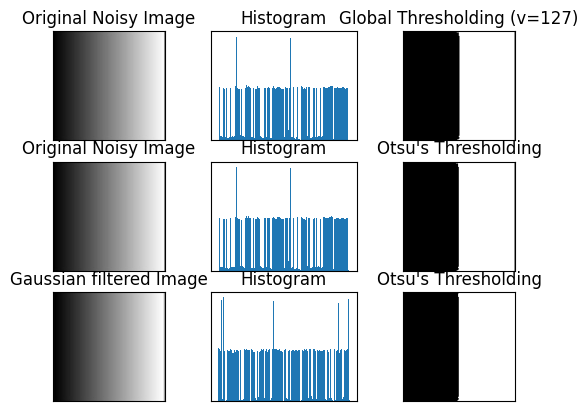

In [49]:

img = cv.imread('/content/Scrshot.png', cv.IMREAD_GRAYSCALE)

# global thresholding
ret1,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)

# Otsu's thresholding
ret2,th2 = cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

# Otsu's thresholding after Gaussian filtering
blur = cv.GaussianBlur(img,(5,5),0)
ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

#histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]

for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

# watershed algorithm

brighter color:touching each other, without touching each other, coins : 3 images how the algorithm works for these 3 images

gray scale of this: intensity may not be seperated properly

# **input image : coins**

In [27]:
import numpy as np
import cv2 as cv
import cv2
from matplotlib import pyplot as plt

img1 = cv.imread('/content/water_coins.jpg')

gray = cv.cvtColor(img1,cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)

In [28]:
from google.colab.patches import cv2_imshow

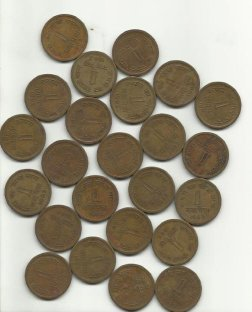

In [29]:
cv2_imshow(img1)

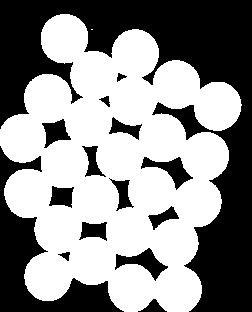

In [30]:
cv2_imshow(thresh)

# input image not touching each other(**separated**)

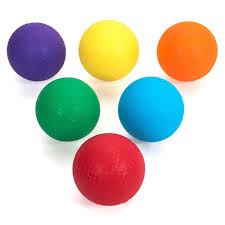

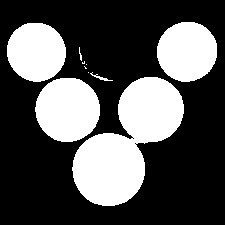

In [32]:
img2 = cv.imread('/content/imagec1.jpeg')

gray = cv.cvtColor(img2,cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
cv2_imshow(img2)
cv2_imshow(thresh)



# **input image touching each other**

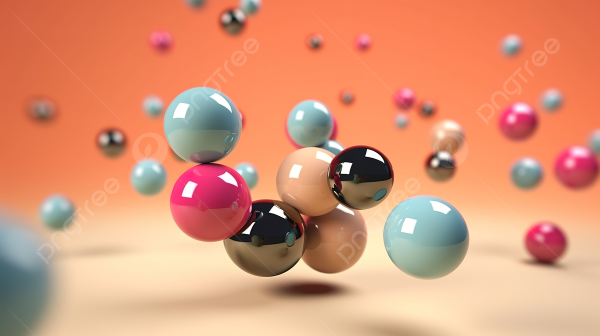

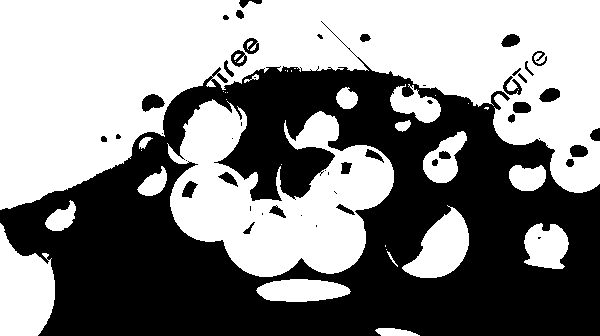

In [38]:
img3 = cv.imread('/content/unball2.jpg')
resized_img = cv.resize(img3, (0, 0), fx=0.5, fy=0.5)


gray = cv.cvtColor(resized_img, cv.COLOR_BGR2GRAY)

# Apply Otsu's thresholding to the grayscale image
ret, thresh = cv.threshold(gray, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)

# Display the resized image and the thresholded image
cv2_imshow(resized_img)
cv2_imshow(thresh)


In [39]:
img4 = cv.imread('/content/shed1.png')

gray = cv.cvtColor(img4,cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)

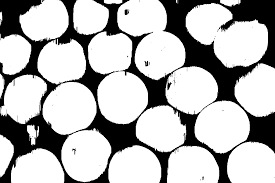

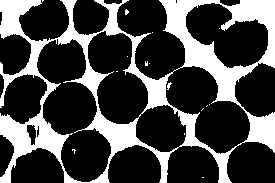

In [40]:
cv2_imshow(img4)
cv2_imshow(thresh)

In [41]:
img5 = cv.imread('/content/shed.png')

gray = cv.cvtColor(img5,cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)

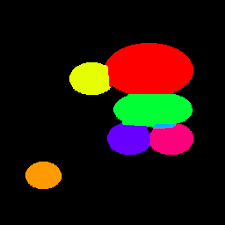

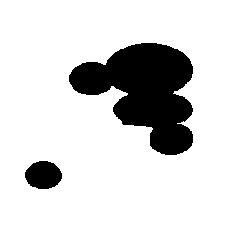

In [43]:
cv2_imshow(img5)
cv2_imshow(thresh)

Inferences:

Thresholding:

Thresholding is a simple yet effective segmentation technique for separating objects from the background in an image.
It works by converting a grayscale image into a binary image, where pixels with intensity values above a specified threshold are set to one value (e.g., 255) and pixels below the threshold are set to another value (e.g., 0).
It is useful for tasks like object detection, feature extraction, and image analysis.


The watershed algorithm:

It is a powerful image segmentation technique.
It is particularly useful for segmenting objects whose boundaries are not well-defined or are touching each other.
The algorithm treats the grayscale image as a topographic surface, where pixels are seen as elevation values.
It's as if we pour water over the image and let it flow to identify the separate areas where the water settles, representing different parts of the image.







